In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
import joblib  
from lightgbm import LGBMRegressor
from sklearn.metrics import roc_auc_score

In [2]:
data_1 = pd.read_csv('data (1).csv')

In [3]:
df1 = data_1.set_index('Emissions, Transportation Sector, MMT CO2 eq.').T

df1.isna().sum()

df1.head()

"Emissions, Transportation Sector, MMT CO2 eq.",Fossil fuel combustion: carbon dioxide,Use of fluorinated gases,Fossil fuel combustion: other greenhouse gases,Other transportation categories,Total
1990,1469.115528,0.000000,45.668591,11.838675,1526.622794
1991,1422.497711,0.000000,47.400427,10.590906,1480.489044
1992,1477.782746,1.168982,50.284896,10.797881,1540.034504
1993,1508.742535,5.097346,52.199885,10.995035,1577.034801
1994,1554.069912,12.406418,54.008438,11.491990,1631.976758


In [4]:
df1 = df1.reset_index()

df1.rename(columns = {'index':'years'},inplace=True)

In [5]:
df1.to_csv('./clean data/transportationEmmisionLevelTotals.csv',index=False)

In [64]:
df1['Total'].max()

1975.9168458537

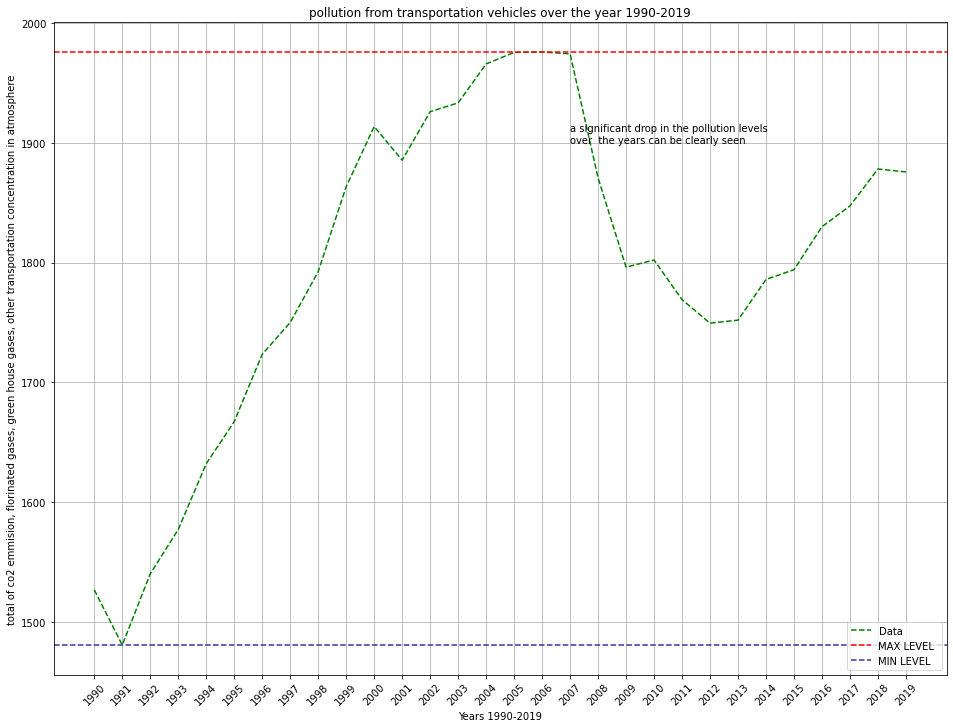

In [6]:
fig = plt.figure(figsize=(16,12))
plt.plot(df1['years'],df1['Total'],'g--')
plt.title('pollution from transportation vehicles over the year 1990-2019')
plt.ylabel('total of co2 emmision, florinated gases, green house gases, other transportation concentration in atmosphere')
plt.xlabel('Years 1990-2019')
plt.xticks(rotation=45)
plt.axhline(y=df1['Total'].max(),
            color='r',linestyle='--')
plt.axhline(y=df1['Total'].min(),
            color='#333399',linestyle='--')
plt.legend(['Data','MAX LEVEL ','MIN LEVEL'],loc='lower right')
plt.text(s='''a significant drop in the pollution levels
over  the years can be clearly seen''',x='2007',y=1900)
plt.grid()
plt.show()


In [7]:
data_2 = pd.read_csv('data (2).csv')

print(data_2.head())

print(data_2.isna().sum())

df2 = data_2.set_index('Emissions, Carbon Dioxide from Fossil Fuel Combustion, MMT CO2 eq.').T

df2 = df2.reset_index()

df2.rename(columns = {'index':'years'},inplace=True)
df2.head()

  Emissions, Carbon Dioxide from Fossil Fuel Combustion, MMT CO2 eq.  \
0                                     Transportation                   
1                             Electricity generation                   
2                                           Industry                   
3                                        Residential                   
4                                         Commercial                   

          1990         1991         1992         1993         1994  \
0  1469.115528  1422.497711  1477.782746  1508.742535  1554.069912   
1  1819.950589  1817.358684  1830.687959  1906.172074  1930.468474   
2   853.808149   839.111308   866.424512   865.291693   872.850770   
3   338.578020   347.719419   353.988691   366.090923   357.049699   
4   228.298201   232.665243   228.048595   222.991370   224.699877   

          1995         1996         1997         1998  ...         2010  \
0  1580.795633  1627.474655  1643.618015  1679.024013  ...  1696.851476

"Emissions, Carbon Dioxide from Fossil Fuel Combustion, MMT CO2 eq.",years,Transportation,Electricity generation,Industry,Residential,Commercial,U.S. territories,Total
0,1990,1469.115528,1819.950589,853.808149,338.578020,228.298201,21.715361,4731.465848
1,1991,1422.497711,1817.358684,839.111308,347.719419,232.665243,21.505261,4680.857626
2,1992,1477.782746,1830.687959,866.424512,353.988691,228.048595,23.058989,4779.991492
3,1993,1508.742535,1906.172074,865.291693,366.090923,222.991370,24.019634,4893.308228
4,1994,1554.069912,1930.468474,872.850770,357.049699,224.699877,25.731749,4964.870482


In [8]:
color_pallete = ['#0066cc','#53ff1a','#ff66d9','#ffbb33','#1affc6','#8533ff']

In [9]:
df2.drop(['years','Total'],axis=1).columns.values

array(['Transportation', 'Electricity generation', 'Industry',
       'Residential', 'Commercial', 'U.S. territories'], dtype=object)

Text(2007, 1400, '⬇⬇⬇⬇ a significant drop in the combustion levels\nfrom different sectors ')

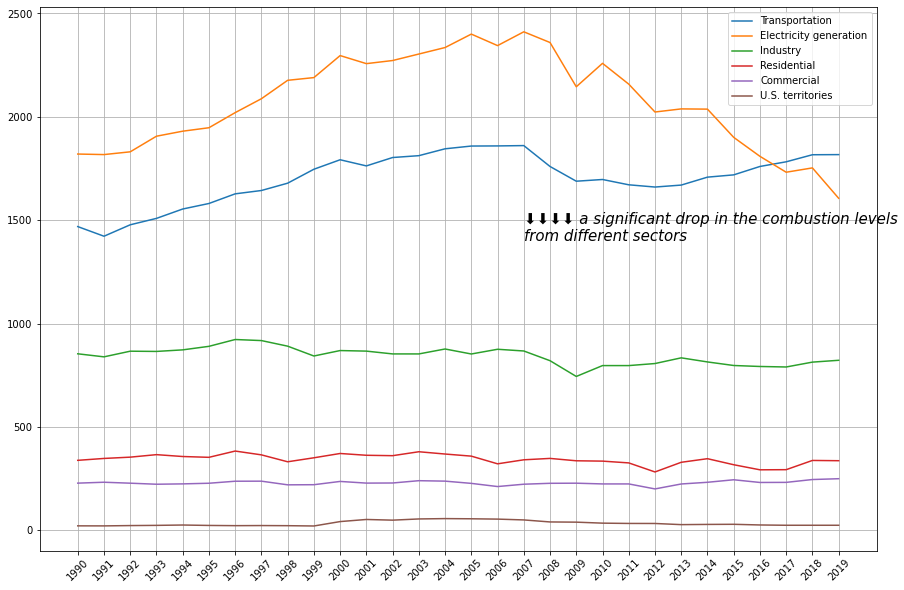

In [61]:
fig = plt.figure(figsize=(15,10))
plt.plot(df2['years'],df2.drop(['years','Total'],axis=1))
plt.legend(['Transportation', 'Electricity generation', 'Industry',
       'Residential', 'Commercial', 'U.S. territories'],loc='upper right')
plt.xticks(rotation=45)
plt.grid()
plt.text(s='''⬇⬇⬇⬇ a significant drop in the combustion levels
from different sectors ''',x='2007',y=1400,fontdict={'fontstyle':'oblique','fontsize':15})#over the years the co2 from electricity gen. reduced significantly after some major steps of reforms were taken by the EPA(env. protection. agency)
# they switched from coal to  cleaner energy sources the result of which is seen as a drop in the pollution level in 2006 ....... 
# for more we can google the cleaner fuel alt. they adopted for over the years....


In [53]:
df2.to_csv('./clean data/fossilfuelCombustionOfDifferentSectors.csv',index=False)

In [17]:
data_3 = pd.read_csv('data (3).csv')

In [18]:
data_3.head()

,"Emissions, Natural Gas and Petroleum Systems, MMT CO2 eq.",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Natural gas - production,61.813243,65.587332,65.615797,69.990753,72.511494,70.426469,72.992806,75.427258,75.950120,...,96.827460,98.075644,98.634970,99.259742,96.982835,96.936525,94.135098,96.616064,100.615165,104.653986
1,Petroleum systems - production,51.179228,51.367904,49.909665,48.054060,47.990545,48.075870,48.452862,48.051780,47.116114,...,44.244163,46.081658,49.286424,56.328106,62.167786,64.564571,54.360142,57.549067,66.448622,77.875581
2,Natural gas - transmission and storage,57.373689,58.097424,58.183471,56.817203,55.561758,54.050220,52.393488,50.652329,48.247107,...,30.500001,29.489525,29.399671,31.168147,32.564333,34.365987,34.824087,32.936551,35.298067,38.203354
3,Natural gas - processing,49.668872,48.403190,48.464687,47.370228,46.608733,42.746108,38.854782,37.765235,33.729173,...,28.619639,29.065045,29.065045,31.175378,31.990734,31.990734,33.215644,34.486819,35.195582,37.227822
4,Natural gas - distribution,45.539083,44.926549,43.826610,43.376735,43.708933,40.541036,38.358858,37.385076,36.218305,...,16.142756,14.896991,14.801318,14.658864,14.507867,14.360108,14.346991,14.235324,14.136092,14.013492


In [21]:
df3 = data_3.set_index('Emissions, Natural Gas and Petroleum Systems, MMT CO2 eq.').T

df3.isna().sum()

Emissions, Natural Gas and Petroleum Systems, MMT CO2 eq.
Natural gas - production                  0
Petroleum systems - production            0
Natural gas - transmission and storage    0
Natural gas - processing                  0
Natural gas - distribution                0
Abandoned oil and gas wells               0
Petroleum - crude oil refining            0
Petroleum systems - exploration           0
Natural gas - exploration                 0
Petroleum - crude oil transportation      0
Total                                     0
dtype: int64

In [23]:
df3 = df3.reset_index()
df3.rename(columns = {'index':'years'},inplace=True)

In [25]:
df3.head()

"Emissions, Natural Gas and Petroleum Systems, MMT CO2 eq.",years,Natural gas - production,Petroleum systems - production,Natural gas - transmission and storage,Natural gas - processing,Natural gas - distribution,Abandoned oil and gas wells,Petroleum - crude oil refining,Petroleum systems - exploration,Natural gas - exploration,Petroleum - crude oil transportation,Total
0,1990,61.813243,51.179228,57.373689,49.668872,45.539083,6.779514,3.973464,3.281818,4.591988,0.164692,284.365591
1,1991,65.587332,51.367904,58.097424,48.403190,44.926549,6.826980,3.941507,3.285784,4.359666,0.163647,286.959983
2,1992,65.615797,49.909665,58.183471,48.464687,43.826610,6.879113,3.985011,3.324524,3.256363,0.158272,283.603513
3,1993,69.990753,48.054060,56.817203,47.370228,43.376735,6.922596,4.033753,3.261639,4.184088,0.155563,284.166618
4,1994,72.511494,47.990545,55.561758,46.608733,43.708933,6.963586,4.108824,2.791711,4.107490,0.152720,284.505793


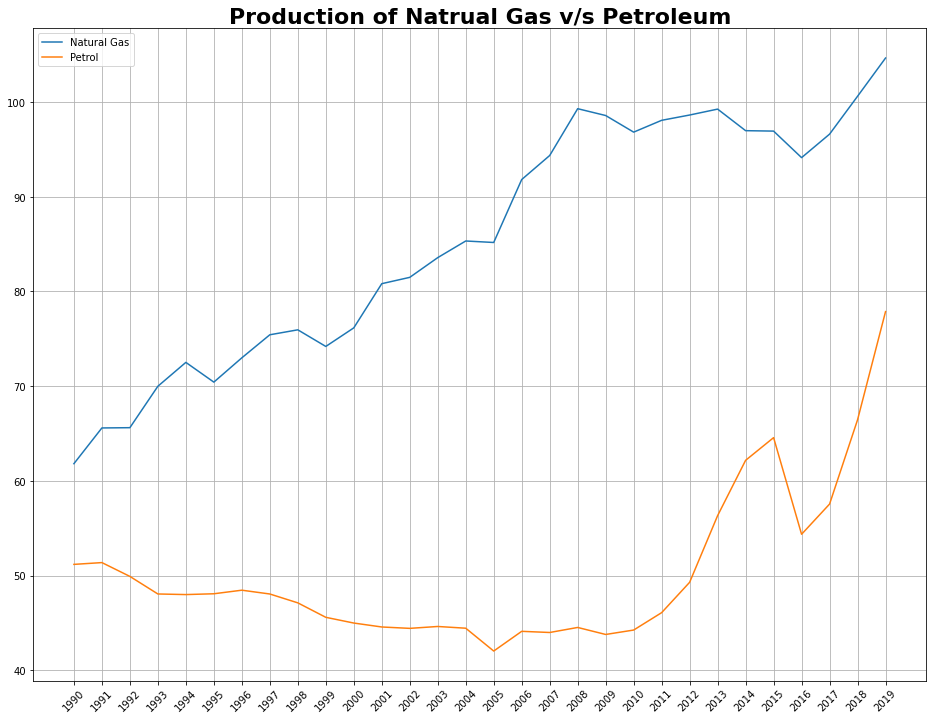

In [36]:
plt.figure(figsize=(16,12))
plt.plot(df3.iloc[:,0],df3.iloc[:,1:3])

plt.xticks(rotation=45)
plt.grid()
plt.title('Production of Natrual Gas v/s Petroleum',fontdict={'fontstyle':'normal','weight':'bold','size':22})
plt.legend(['Natural Gas','Petrol'])
plt.show()

In [38]:
df3.to_csv('./clean data/petroleumVsNaturalGas.csv',index=False)

In [41]:
data = pd.read_excel('datafile.xlsx')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [43]:
data.loc[data['State']=='Delhi']

,State,City,Location,Type,Numbers of monitoring days (n),False,Standard Deviation,Percentage- exceedence(24 hourly),Air Quality
48,Delhi,Delhi,Mayapuri Industrial Area,Industrial,96,461,240,40,High
49,Delhi,Delhi,Shahzada Bagh,Industrial,78,378,183,26,High
50,Delhi,Delhi,Shahdara,Industrial,78,440,173,35,High
51,Delhi,Delhi,Sarojini Nagar,Residential and other,79,305,164,66,Critical
52,Delhi,Delhi,Town hall,Residential and other,95,476,224,92,Critical
53,Delhi,Delhi,Nizamuddin,Residential and other,72,347,181,81,Critical
54,Delhi,Delhi,Pritampura,Residential and other,63,322,166,80,Critical
55,Delhi,Delhi,Siri Fort,Residential and other,76,353,183,80,Critical
56,Delhi,Delhi,Janakpuri,Residential and other,70,348,152,79,Critical


In [44]:
pd.read_excel('datafile.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Stn Code,Sampling Date,State,City/Town/Village/Area,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM
0,59,7/1/1988,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,114.0
1,57,8/2/1988,Delhi,Delhi,Central Pollution Control Board,Industrial Area,NaN,NaN,NaN,169.0
2,60,8/2/1988,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,130.0
3,55,8/3/1988,Delhi,Delhi,Central Pollution Control Board,Industrial Area,NaN,NaN,NaN,133.0
4,56,8/1/1988,Delhi,Delhi,Central Pollution Control Board,Industrial Area,NaN,NaN,NaN,160.0
5,59,8/1/1988,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,126.0
6,57,9/3/1988,Delhi,Delhi,Central Pollution Control Board,Industrial Area,13.8,29.9,NaN,NaN
7,60,9/2/1988,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",3.1,18.5,NaN,NaN
8,58,9/1/1988,Delhi,Delhi,Central Pollution Control Board,Industrial Area,16.2,16.0,NaN,NaN
9,55,9/1/1988,Delhi,Delhi,Central Pollution Control Board,Industrial Area,10.4,11.6,NaN,NaN


In [51]:
with open('dataair.csv') as f:
    print(f)

<_io.TextIOWrapper name='dataair.csv' mode='r' encoding='cp1252'>


In [2]:
df = pd.read_csv('dataair.csv',encoding='cp1252')

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

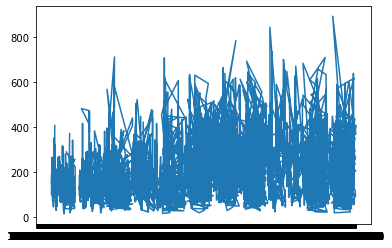

In [18]:
plt.plot(df.loc[df['state']=='Delhi','date'].astype('str'),df.loc[df['state']=='Delhi','rspm'])

In [17]:
df.loc[df['state']=='Delhi','date']

65861    1987-01-09
65862    1987-02-09
65863    1987-03-09
65864    1987-03-09
65865    1987-02-09
            ...    
74407    2015-12-16
74408    2015-12-21
74409    2015-12-28
74410    2015-12-29
74411    2015-12-31
Name: date, Length: 8551, dtype: object

In [9]:
df.loc[df['state']=='Delhi',:].isna().sum()

stn_code                       3305
sampling_date                     0
state                             0
location                          0
agency                         3956
type                              0
so2                             741
no2                             544
rspm                           1884
spm                            3092
location_monitoring_station    2022
pm2_5                          8180
date                              0
dtype: int64

In [10]:
df.loc[df['state']=='Delhi',:].describe()

,so2,no2,rspm,spm,pm2_5
count,7810.000000,8007.000000,6667.000000,5459.000000,371.000000
mean,8.737273,53.489147,196.639771,399.402088,95.113208
std,7.613131,27.494406,115.925078,188.775771,47.127178
min,0.500000,2.800000,13.000000,30.000000,14.000000
25%,4.000000,35.000000,111.000000,266.000000,62.000000
50%,6.000000,47.000000,171.000000,366.000000,86.000000
75%,11.600000,62.350000,256.000000,501.000000,118.500000
max,127.400000,224.000000,892.000000,1885.000000,318.000000


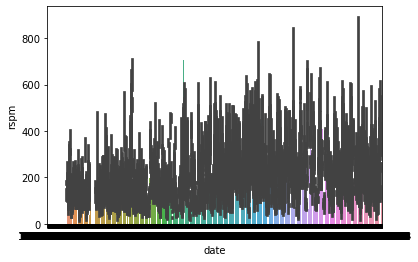

In [19]:
sns.barplot(df.loc[df['state']=='Delhi','date'].astype('str'),df.loc[df['state']=='Delhi','rspm'])

In [ ]:
### this representation is made much better in tableau , check that out !!!

# explain what is rspm , spm and other terms so that we can let the reader have a better understanding of what we know.... and make him aware toooo
# 

In [20]:
with open('Table_3.7c_Petroleum_Consumption___Transportation_and_Electric_Power_Sectors.xlsx') as f:
    print(f)
    

#it appears most of the data sets were using this encoding ---- cp1252

<_io.TextIOWrapper name='Table_3.7c_Petroleum_Consumption___Transportation_and_Electric_Power_Sectors.xlsx' mode='r' encoding='cp1252'>


In [ ]:
petrol_con = pd.read_excel('Table_3.7c_Petroleum_Consumption___Transportation_and_Electric_Power_Sectors.xlsx',)

In [ ]:

# for delhi data ----> https://data.gov.in/catalog/air-quality-respect-suspended-particulate-matter-under-national-air-quality-monitoring?filters%5Bfield_catalog_reference%5D=85767&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc

In [2]:
df = pd.read_csv('table_export.csv')

In [16]:
df.head()

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,1975,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,1975,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
2,1975,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
3,1975,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
4,1975,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-


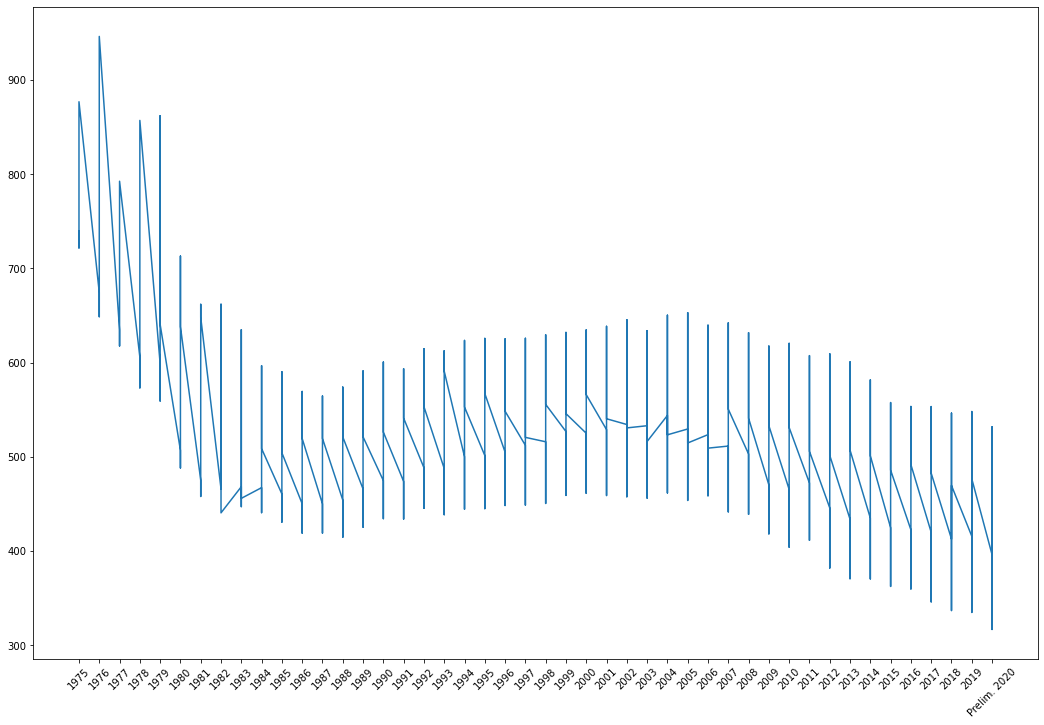

In [11]:
plt.figure(figsize=(18,12))
plt.plot(df['Model Year'],df['Real-World CO2_City (g/mi)'])
plt.xticks(rotation=45)
plt.show()

In [13]:
df.isna().sum()

Model Year                    0
Regulatory Class              0
Vehicle Type                  0
Production Share              0
Real-World MPG                0
Real-World MPG_City           0
Real-World MPG_Hwy            0
Real-World CO2 (g/mi)         0
Real-World CO2_City (g/mi)    0
Real-World CO2_Hwy (g/mi)     0
Weight (lbs)                  0
Horsepower (HP)               0
Footprint (sq. ft.)           0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model Year                  368 non-null    object 
 1   Regulatory Class            368 non-null    object 
 2   Vehicle Type                368 non-null    object 
 3   Production Share            368 non-null    float64
 4   Real-World MPG              368 non-null    float64
 5   Real-World MPG_City         368 non-null    float64
 6   Real-World MPG_Hwy          368 non-null    float64
 7   Real-World CO2 (g/mi)       368 non-null    float64
 8   Real-World CO2_City (g/mi)  368 non-null    float64
 9   Real-World CO2_Hwy (g/mi)   368 non-null    float64
 10  Weight (lbs)                368 non-null    float64
 11  Horsepower (HP)             368 non-null    float64
 12  Footprint (sq. ft.)         368 non-null    object 
dtypes: float64(9), object(4)
memory usa

No null values to be cleaned in the data , other representations are given in tableau...

Converting model year into 'int' cannot pass it into model this way....


In [3]:
df.loc[df['Model Year']=='Prelim. 2020',['Model Year']] = '2020'

In [4]:
df.loc[df['Model Year']=='2020']

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
360,2020,All,All,1.000000,25.68668,22.30853,28.99946,343.58418,396.04948,304.00509,4177.324,246.8687,50.37178
361,2020,Truck,All Truck,0.571723,22.59266,19.64241,25.47968,393.78708,452.84333,349.23588,4598.515,272.9226,53.06803
362,2020,Car,All Car,0.428277,31.43323,27.24521,35.55638,276.56636,320.23315,243.62474,3615.061,212.0882,46.77245
363,2020,Truck,Truck SUV,0.408446,23.85366,20.80423,26.81922,372.25326,426.75118,331.14080,4396.501,251.0150,49.13703
364,2020,Car,Sedan/Wagon,0.332830,32.02186,27.56718,36.46739,271.71313,316.73002,237.75302,3557.897,209.6671,46.73399
365,2020,Truck,Pickup,0.136940,19.45440,16.82960,22.04854,460.13764,531.82056,406.06104,5192.148,340.4643,64.35540
366,2020,Car,Car SUV,0.095447,29.53973,26.17903,32.70721,293.48992,332.44883,264.09987,3814.395,220.5308,46.90658
367,2020,Truck,Minivan/Van,0.026337,23.02828,19.70052,26.39129,382.75165,446.84756,334.39859,4644.827,261.4910,55.34265


In [5]:
df['model year'] = df['Model Year'].astype('int')
df.drop(['Model Year','Footprint (sq. ft.)'],axis=1,inplace=True)

### encoding all labels of regulatory class & vehicle type 

In [6]:
enc = LabelEncoder()

In [7]:
df['Regulatory Class'] = enc.fit_transform(df['Regulatory Class'])
df['Vehicle Type'] = enc.fit_transform(df['Vehicle Type'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Regulatory Class            368 non-null    int32  
 1   Vehicle Type                368 non-null    int32  
 2   Production Share            368 non-null    float64
 3   Real-World MPG              368 non-null    float64
 4   Real-World MPG_City         368 non-null    float64
 5   Real-World MPG_Hwy          368 non-null    float64
 6   Real-World CO2 (g/mi)       368 non-null    float64
 7   Real-World CO2_City (g/mi)  368 non-null    float64
 8   Real-World CO2_Hwy (g/mi)   368 non-null    float64
 9   Weight (lbs)                368 non-null    float64
 10  Horsepower (HP)             368 non-null    float64
 11  model year                  368 non-null    int32  
dtypes: float64(9), int32(3)
memory usage: 30.3 KB


# Making Model 

In [9]:
X_pre,y_pre = df.drop(['Real-World CO2 (g/mi)','Real-World CO2_City (g/mi)','Real-World CO2_Hwy (g/mi)'],axis=1),df['Real-World CO2 (g/mi)']

In [10]:
X_pre.drop(['Real-World MPG_City','Real-World MPG_Hwy','Production Share','Regulatory Class','Vehicle Type'],inplace=True,axis=1)

In [13]:
X,y = X_pre[:-40],y_pre[:-40]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
predict = lr.predict(X_test)

In [36]:
y_test

246    460.41503
178    380.26313
165    491.59189
134    531.24220
160    433.83372
         ...    
46     675.57737
232    460.55651
100    466.95388
10     597.85756
158    555.20998
Name: Real-World CO2 (g/mi), Length: 82, dtype: float64

In [29]:
predict

array([524.08443302, 415.64932458, 384.88452081, 519.81560915,
       426.01782031, 451.3186657 , 234.88360643, 549.53257652,
       541.59882246, 372.80044127, 709.85873804, 502.12179899,
       644.49875151, 523.55143992, 484.61252255, 557.91456254,
       383.94443778, 381.58275065, 553.83473529, 528.24287688,
       526.55122327, 388.43220158, 345.54456437, 614.50116711,
       537.15587954, 662.6310974 , 675.36124191, 567.86967264,
       462.86595625, 562.83924202, 370.20685728, 545.2125391 ,
       380.5780599 , 433.21138977, 458.4534386 , 457.37065939,
       542.29173915, 550.62095047, 394.73236124, 452.37773697,
       586.93841186, 655.43445889, 534.06945661, 461.80827725,
       444.03357391, 405.87909741, 521.76786341, 425.747197  ,
       509.07320325, 405.19231849, 534.52893781, 565.11314195,
       361.48893398, 516.47881329, 484.43510458, 398.81879205,
       490.62474725, 504.54316234, 641.83778459, 563.59501838,
       604.98573479, 537.13674653, 554.08427614, 511.68

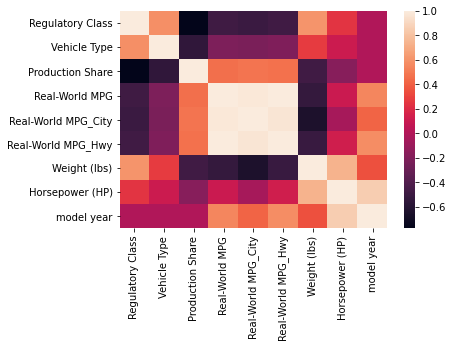

In [44]:
sns.heatmap(X.corr())

In [28]:
mean_squared_error(y_test,predict)

507.59869662796956

# the results are bad lets try reducing correlated features and remove multicollinearity 

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Regulatory Class     328 non-null    int32  
 1   Vehicle Type         328 non-null    int32  
 2   Production Share     328 non-null    float64
 3   Real-World MPG       328 non-null    float64
 4   Real-World MPG_City  328 non-null    float64
 5   Real-World MPG_Hwy   328 non-null    float64
 6   Weight (lbs)         328 non-null    float64
 7   Horsepower (HP)      328 non-null    float64
 8   model year           328 non-null    int32  
dtypes: float64(6), int32(3)
memory usage: 19.3 KB


In [52]:
X_train.drop(['Real-World MPG_City','Real-World MPG_Hwy','Production Share','Regulatory Class','Vehicle Type'],inplace=True,axis=1)

In [53]:
X_test.drop(['Real-World MPG_City','Real-World MPG_Hwy','Production Share','Regulatory Class','Vehicle Type'],inplace=True,axis=1)

In [54]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
pred = lr.predict(X_test)

In [56]:
mean_squared_error(y_test,pred)

680.9437626873224

In [57]:
pred

array([488.7127629 , 547.02471673, 356.26264159, 442.8509349 ,
       527.7045209 , 484.55182298, 381.63722434, 554.75489642,
       544.0423851 , 610.07979856, 328.61763745, 530.27202517,
       346.37157512, 651.60196221, 385.62921264, 474.16197203,
       379.63791398, 543.70456579, 530.48149109, 444.52446828,
       491.60152321, 535.4673226 , 560.47776076, 461.49682155,
       461.58924525, 554.02067267, 360.31616573, 528.38075014,
       371.48887748, 387.37055507, 376.73559767, 436.57760729,
       380.02260616, 680.59056134, 469.73681814, 301.44679148,
       496.21940573, 422.13783164, 442.72991795, 606.41994265,
       468.66194839, 440.29088096, 497.22226885, 391.03856772,
       567.42251686, 711.15201655, 407.99050289, 382.2941174 ,
       563.18017391, 500.19319275, 554.97382969, 510.76909383,
       553.88073236, 417.30724176, 502.2984644 , 698.81326275,
       466.53647506, 460.81549443, 248.87115249, 291.0798633 ,
       495.68856898, 368.97372015, 443.51694796, 380.73

In [80]:
rf = RandomForestRegressor()

In [81]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
pred = rf.predict(X_test)

In [83]:
mean_squared_error(y_test,pred)

8.651514491620981

In [63]:
rf = RandomForestRegressor()

# This is much better but still not good enough to be a good model 

In [35]:
params = {'n_estimators':[50,70,100,120,150],
     'max_depth':[3,7,9,11,13,15]}

grid = GridSearchCV(rf,params,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')

grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 7, 9, 11, 13, 15],
                         'n_estimators': [50, 70, 100, 120, 150]},
             scoring='neg_mean_squared_error')

In [96]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [103]:
grid.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=70)

In [36]:
pred = grid.predict(X_test)

In [37]:
mean_squared_error(y_test,pred)

10.471977932617413

In [84]:
# save
joblib.dump(grid,'rfmodel_mse_10.pkl')
joblib.dump(rf,'rfmodel_mse_8.pkl')

['rfmodel_mse_8.pkl']

In [85]:
val_pred = rf.predict(X_pre[-40:])

## this is still overfitting so i am removing the validation set to see if it makes any difference !!

In [86]:
mean_squared_error(y_pre[-40:],val_pred)

150.2012485357634

# More things can be added to improve the MSE further 

## lets Try them out tooo

In [4]:
lgbm = LGBMRegressor()

In [20]:
params = {'n_estimators':[50,70,100,120,150],
     'max_depth':[3,7,9,11,13,15]}

grid = GridSearchCV(lgbm,params,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')

grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 7, 9, 11, 13, 15],
                         'n_estimators': [50, 70, 100, 120, 150]},
             scoring='neg_mean_squared_error')

In [24]:
grid.best_score_

-662.2851452422357

lgbm.fit(X_train,y_train)

In [22]:
pred = grid.predict(X_test)

In [23]:
mean_squared_error(y_test,pred)

542.048828137225

In [25]:
X_train

,Real-World MPG,Weight (lbs),Horsepower (HP),model year
61,14.72404,4342.080,132.2636,1982
149,18.20216,4105.496,155.0834,1993
34,17.24547,3484.872,119.4639,1979
217,22.78274,3415.317,173.3268,2002
223,19.30479,3747.361,179.0031,2002
...,...,...,...,...
288,22.28844,4125.934,229.9718,2011
76,18.25999,3618.901,114.0118,1984
325,18.80861,5164.656,324.1680,2015
224,19.58451,3998.835,198.5784,2003


## seems like we have to go forward with Random Forest Model Only and MSE == 19 , I will try increasing accuracy of this !!! 

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_pre,y_pre)

In [15]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
predict = rf.predict(X_test)

In [25]:
mean_squared_error(y_test,predict)

6.8789880993681205

## this model seems to be woking fine but still i believe its overfitting, i cannot validate the results though but surely lets try doing something else which can prove our point !!

#### 

In [19]:
help(roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics._ranking:

roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.
    
    Note: this implementation can be used with binary, multiclass and
    multilabel classification, but some restrictions apply (see Parameters).
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
        True labels or binary label indicators. The binary and multiclass cases
        expect labels with shape (n_samples,) while the multilabel case expects
        binary label indicators with shape (n_samples, n_classes).
    
    y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
        Target scores. In the binary and multilabel cases, these can be either
      

In [23]:
y_test.astype(int)

248    441
20     655
2      660
62     615
58     402
      ... 
205    555
42     446
109    497
322    305
171    518
Name: Real-World CO2 (g/mi), Length: 92, dtype: int32

In [24]:
roc_auc_score(y_test.astype(int),
              predict.astype(int))

ValueError: multi_class must be in ('ovo', 'ovr')